In [9]:
import os
import time
import random
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from collections import Counter

def download_html(url):
    try:
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(req).read()
        return html
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [12]:
# Function to scrape movie data
def scrape_movies(html_content, ratings, votes, grosses, genres):
    soup = BeautifulSoup(html_content, "html.parser")
    movie_containers = soup.find_all('div', class_='lister-item mode-advanced')

    for container in movie_containers:
        if container.find('div', class_='ratings-bar'):
            # Extract ratings
            rating = float(container.strong.text)
            ratings.append(rating)

            # Extract number of votes
            vote = container.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

            # Extract gross earnings if available
            gross_span = container.find_all('span', attrs={'name':'nv'})
            if len(gross_span) > 1 and 'data-value' in gross_span[1].attrs:
                grosses.append(int(gross_span[1]['data-value'].replace(',', '')))
            else:
                grosses.append(None)  # Append None if gross is not available

            # Extract genre
            genre_tags = container.find('span', class_='genre')
            if genre_tags:
                genre_list = [g.strip() for g in genre_tags.text.split(',')]
                genres.extend(genre_list)


# Lists to store scraped data
ratings = []
votes = []
grosses = []
genres = []

# Loop through pages to download IMDb's top 1000 movies
start = 1
for y in range(1, 11):
    tmp = random.random() * 5.0
    print('Sleep for', tmp, 'seconds')
    time.sleep(tmp)

    url = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start={start}&count=100"
    print('Download from:', url)

    # Download and scrape the HTML page
    html = download_html(url)
    if html:
        scrape_movies(html, ratings, votes, grosses,genres)
    else:
        print(f"Failed to retrieve data from {url}")

    start += 100

clean_votes = [vote for vote, gross in zip(votes, grosses) if gross is not None]
clean_ratings = [rating for rating, gross in zip(ratings, grosses) if gross is not None]
clean_grosses = [gross for gross in grosses if gross is not None]

Sleep for 1.4165105457544218 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=1&count=100
Sleep for 2.4420793538501853 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=101&count=100
Sleep for 2.7186870919902075 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=201&count=100
Sleep for 1.5189258153859009 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=301&count=100
Sleep for 0.6620391511796409 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=401&count=100
Sleep for 0.7911885511250977 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=501&count=100
Sleep for 2.0540299150203727 seconds
Download from: https://www.imdb.com/searc

In [14]:
# Function to create scatter plots
def create_scatter_plot(x, y, title, x_label, y_label, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)

    log_x = np.log(x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

    best_fit_x = np.linspace(min(x), max(x), 1000)
    best_fit_y = slope * np.log(best_fit_x) + intercept

    plt.plot(best_fit_x, best_fit_y, color='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yscale('linear')
    plt.xscale('log')
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

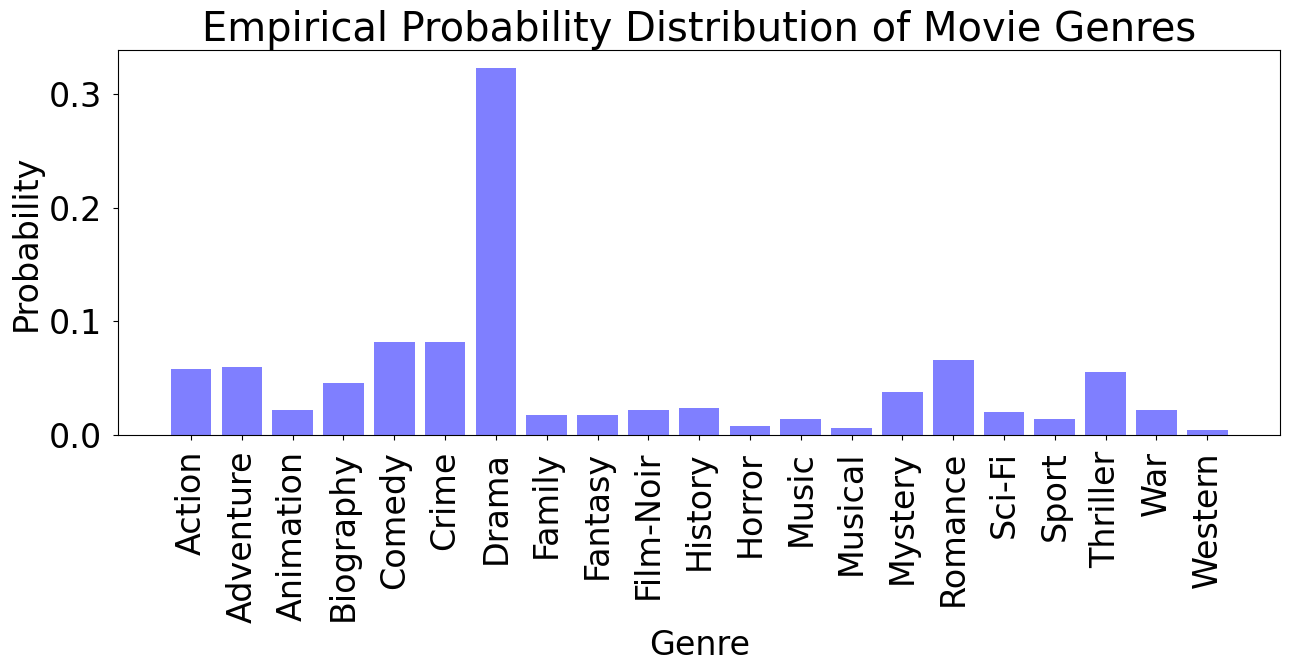

In [16]:
genre_counts = Counter(genres)

# Calculating the total number of genre entries
total_genres = sum(genre_counts.values())

# Calculating probabilities for each genre
genre_probabilities = {genre: count / total_genres for genre, count in genre_counts.items()}

# Sorting genres for a consistent plot
sorted_genres = sorted(genre_probabilities.keys())
probabilities = [genre_probabilities[genre] for genre in sorted_genres]

# Styling the plot
plt.figure(figsize=(15, 5))
plt.rc('text', usetex=False)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

# Creating the bar plot
plt.bar(sorted_genres, probabilities, color='blue', alpha=0.5)
plt.xlabel('Genre')
plt.ylabel('Probability')
plt.title('Empirical Probability Distribution of Movie Genres')
plt.xticks(rotation=90)  # Rotates the genre names for better readability

plt.show()

The bar chart shows the empirical probability distribution of various movie genres, suggesting the relative frequency of each genre within a given set of top movies. Drama stands out as the most common genre, with a significantly higher probability compared to others. This suggests that drama is a common element among top movies, possibly indicating a preference for dramatic storytelling or that it is often combined with other genres.

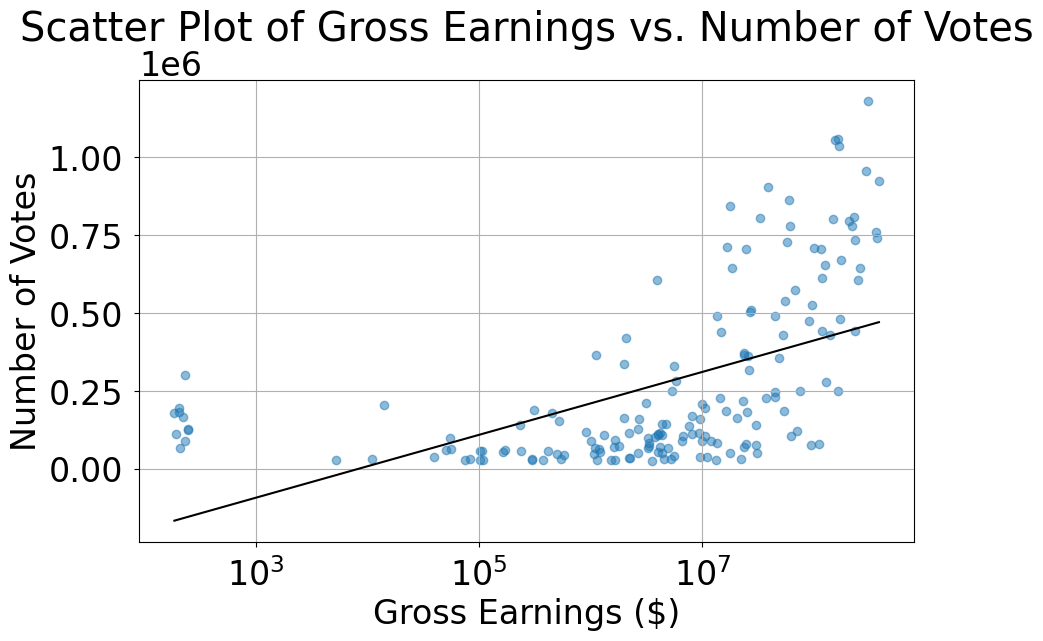

In [17]:
create_scatter_plot(clean_grosses, clean_votes, 'Scatter Plot of Gross Earnings vs. Number of Votes', 'Gross Earnings ($)', 'Number of Votes', 'gross_vs_votes_scatter.png')

We can see a positive correlation between gross earnings and number of votes. Movies that receive a high number of votes are likely to have engaged a significant audience. This engagement can be a strong indicator of a movie's popularity, which often translates to higher box office earnings.